In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("undersampled_2022.csv")
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-548864,Source2,1,2022-08-02 07:23:58,2022-08-02 08:21:10,26.656250,-81.804031,0.000,Crash on Luckett Rd at Corporation Cir.,Hamilton Dr,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-543317,Source2,1,2022-08-08 07:56:47,2022-08-08 08:57:22,36.084160,-86.705849,0.000,Crash on Linbar Dr around TN-255 Harding Pl.,Linbar Dr,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-616953,Source2,1,2022-05-19 16:32:02,2022-05-19 17:19:32,35.464352,-97.500214,0.000,Crash on Reno Ave at Lincoln Blvd.,E Reno Ave,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-545513,Source2,1,2022-08-05 07:18:31,2022-08-05 07:47:28,43.119068,-83.760162,0.000,Crash on Mt Morris Rd near Enterprise Pkwy.,Enterprise Pkwy,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-584099,Source2,1,2022-06-24 06:58:24,2022-06-24 10:01:43,28.128380,-81.946480,0.000,Crash on Old Polk City Rd near CR-582 Socrum L...,Grady Mock Rd,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143515,A-4503881,Source1,4,2022-03-17 15:16:00,2022-03-17 16:31:00.000000000,34.277097,-84.814657,8.525,Incident on I-75 NB near GA-140 Road closed. T...,GA-401 N,...,False,False,False,False,False,False,Day,Day,Day,Day
143516,A-3824654,Source1,4,2022-11-12 10:10:30,2022-11-12 12:13:32,39.579060,-77.786541,0.071,MD 68 EAST/WEST AT LOCK TENDER LA,Lappans Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
143517,A-4623537,Source1,4,2022-09-05 21:42:00,2022-09-06 00:06:18.000000000,40.984835,-75.217604,3.541,Crash on US 209 southbound between Exit: I-80 ...,I-80 W,...,False,False,False,False,False,False,Night,Night,Night,Night
143518,A-5159294,Source1,4,2022-03-16 11:49:14,2022-03-16 12:49:14,45.890739,-119.298530,0.205,A crash has occurred use an alternate route.,N Highway 395,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df.iloc[0]

ID                                                      A-548864
Source                                                   Source2
Severity                                                       1
Start_Time                                   2022-08-02 07:23:58
End_Time                                     2022-08-02 08:21:10
Start_Lat                                               26.65625
Start_Lng                                             -81.804031
Distance(mi)                                                 0.0
Description              Crash on Luckett Rd at Corporation Cir.
Street                                               Hamilton Dr
City                                                  Fort Myers
County                                                       Lee
State                                                         FL
Zipcode                                               33905-4400
Country                                                       US
Timezone                 

In [5]:
nan_columns = df.columns[df.isna().any()]
print("有缺值的欄位：", nan_columns.tolist())

# 計算每個有缺值欄位的缺值數量
nan_counts = df[nan_columns].isna().sum()
print("各欄位缺值數量：")
print(nan_counts)

有缺值的欄位： []
各欄位缺值數量：
Series([], dtype: float64)


In [6]:
# 1. 自動選擇數值型欄位
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# 2. 處理異常值
for c in num_cols:
    # 計算每個欄位的第一四分位數 (Q1) 和第三四分位數 (Q3)
    q1, q3 = df[c].quantile([0.25, 0.75])
    
    # 計算 IQR = Q3 - Q1
    iqr = q3 - q1
    
    # 使用 clip() 函數將數值超出 IQR 範圍的資料夾回範圍內
    df[c] = df[c].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)

In [7]:
import pandas as pd

# 1. 去除有 NaN 的列（針對整張表，也可改針對特定欄位）
df_clean = df

# 2. 確保時間欄位是 datetime 型態
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'])
df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'], errors='coerce', infer_datetime_format=True)
df_clean['Weather_Timestamp'] = pd.to_datetime(df_clean['Weather_Timestamp'])

# 3. 從時間欄位拆出小時與分鐘
df_clean['Hour'] = df_clean['Start_Time'].dt.hour

df_clean['Weather_Hour'] = df_clean['Weather_Timestamp'].dt.hour

# 4. 檢查結果
print(df_clean[['Start_Time', 'Hour', 'Weather_Timestamp', 'Weather_Hour']].head())

           Start_Time  Hour   Weather_Timestamp  Weather_Hour
0 2022-08-02 07:23:58     7 2022-08-02 07:53:00             7
1 2022-08-08 07:56:47     7 2022-08-08 07:53:00             7
2 2022-05-19 16:32:02    16 2022-05-19 16:52:00            16
3 2022-08-05 07:18:31     7 2022-08-05 07:10:00             7
4 2022-06-24 06:58:24     6 2022-06-24 06:55:00             6


C:\Users\Tim Chen\AppData\Local\Temp\ipykernel_20492\2020919463.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'], errors='coerce', infer_datetime_format=True)


In [8]:
# ## 1. 時間衍生特徵與天氣標準化

print("衍生時間特徵...")
df_clean['DayOfWeek']  = df_clean['Start_Time'].dt.dayofweek
df_clean['Month']      = df_clean['Start_Time'].dt.month
df_clean['IsWeekend']  = df_clean['DayOfWeek'].isin([5, 6]).astype(int)
df_clean['IsRushHour'] = df_clean['Hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)
df_clean['IsNight']    = ((df_clean['Hour'] >= 22) | (df_clean['Hour'] <= 4)).astype(int)

print("標準化天氣條件...")
weather_conditions = {
    'Clear' : ['Clear', 'Fair', 'Sunny'],
    'Cloudy': ['Cloudy', 'Overcast', 'Partly Cloudy', 'Mostly Cloudy'],
    'Rain'  : ['Rain', 'Light Rain', 'Heavy Rain', 'Drizzle', 'Showers'],
    'Snow'  : ['Snow', 'Light Snow', 'Heavy Snow', 'Sleet', 'Hail'],
    'Fog'   : ['Fog', 'Mist', 'Haze', 'Smoke', 'Dust'],
    'Windy' : ['Windy', 'Breezy', 'Blustery'],
    'Other' : ['Other', 'Unknown']
}

def standardize_weather(cond):
    if pd.isna(cond):
        return 'Other'
    for k, v in weather_conditions.items():
        if cond in v:
            return k
    return 'Other'
df_clean['Weather_Category'] = df_clean['Weather_Condition'].apply(standardize_weather)

衍生時間特徵...
標準化天氣條件...


In [9]:
# --- 1. 先把 df_clean 複製回來，保險起見用 .copy() ---
df = df_clean.copy()

# --- 2. 不想要完整 timestamp → 直接 drop ---
df = df.drop(columns=['Start_Time', 'End_Time', 'Weather_Timestamp'])

In [10]:
# 時間特徵
df['IsRushHour']  = ((df['Hour'].between(7, 9)) | (df['Hour'].between(16, 18))).astype(int)
df['IsNight']     = ((df['Hour'] >= 22) | (df['Hour'] <= 4)).astype(int)
df['IsWeekend']   = df['DayOfWeek'].isin([5, 6]).astype(int)

# 天氣特徵
df['IsBadWeather']      = df['Weather_Condition'].isin(['Rain', 'Snow', 'Fog']).astype(int)
df['IsGoodVisibility']  = (df['Visibility(mi)'] > 10).astype(int)

# 地點特徵
df['IsUrban'] = (df[['Amenity','Bump','Crossing','Junction']].any(axis=1)).astype(int)

# --- 擴充時間特徵 ---
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['TimeOfDay'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# 1b. 季節性特徵 (Season)
# 將月份對應到季節，捕捉季節性風險
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall',
    12: 'Winter'
}
df['Season'] = df['Month'].map(seasons)

# 1c. 週期性小時特徵 (Cyclical Hour)
# 讓模型理解 23 點和 0 點是相近的
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24.0)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24.0)

# 1b. 低溫且有降水 (結冰風險)
# 捕捉可能導致路面結冰的高風險情境
df['IsFreezingPrecip'] = ((df['Temperature(F)'] < 35) & (df['Precipitation(in)'] > 0)).astype(int)

# --- 擴充地點特徵 (續) ---
# (假設您已定義了 road_features 列表)
road_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
                 'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',
                 'Turning_Loop']

# 2a. 道路複雜度分數
# 計算一個地點有多少種交通設施，作為該地點複雜度的量化指標
df['Road_Complexity'] = df[road_features].sum(axis=1)


# 2b. 道路設施與惡劣天氣的交互作用
# 在惡劣天氣下，交通號誌或鐵路交叉口的存在是否會放大風險？
df['Signal_x_BadWeather'] = df['Traffic_Signal'] * df['IsBadWeather']

# --- 擴充時間特徵 (續) ---

# 3a. 週期性星期特徵 (Cyclical DayOfWeek)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7.0)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7.0)

# 3b. 週期性月份特徵 (Cyclical Month)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12.0)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12.0)

df['isSnow'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Snow'])
df['isFog'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Fog'])
df['isRain'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Rain'])
df['isClear'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Clear'])
df['isCloudy'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Cloudy'])
df['isWindy'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Windy'])
df['isOther'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Other'])

In [11]:
# --- 3. 重新檢查一下結果 ---
df.iloc[100]

ID            A-624091
Source         Source2
Severity             1
Start_Lat    33.482388
Start_Lng   -79.097496
               ...    
isRain           False
isClear          False
isCloudy          True
isWindy          False
isOther          False
Name: 100, Length: 70, dtype: object

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

# ────────────────────────────────
# 1. 讀檔 & 標籤調整
# ────────────────────────────────
y  = df['Severity'] - 1          # 0 ~ 3
X  = df.drop(columns=['Severity', 'ID', 'Description', 'Street', 'City',
                      'County', 'Zipcode', 'Airport_Code', 'Source', 'Distance(mi)'])

# ────────────────────────────────
# 2. 特徵欄位分組
# ────────────────────────────────
binary_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
               'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
               'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'IsRushHour', 
               'IsNight', 'IsWeekend', 'IsBadWeather', 'IsGoodVisibility', 'IsUrban',
               'IsFreezingPrecip', 'Signal_x_BadWeather', 'isSnow', 'isFog', 'isClear', 'isCloudy', 'isWindy']

small_cat_cols = ['Country', 'Timezone', 'Wind_Direction',
                  'Sunrise_Sunset', 'Civil_Twilight',
                  'Nautical_Twilight', 'Astronomical_Twilight',
                  'TimeOfDay', 'Season']

num_cols = ['Start_Lat', 'Start_Lng', 'Temperature(F)',
            'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
            'Wind_Speed(mph)', 'Precipitation(in)', 'DayOfWeek_sin', 'DayOfWeek_cos',
            'Hour', 'Hour_sin', 'Hour_cos', 'Road_Complexity', 'Month_sin', 'Month_cos',
            'Weather_Hour']

# ────────────────────────────────
# 3. 前處理器
# ────────────────────────────────
preproc = ColumnTransformer([
    ('num',  SimpleImputer(strategy='median'), num_cols),
    ('bin',  'passthrough',                    binary_cols),
    ('cat',  OneHotEncoder(handle_unknown='ignore'), small_cat_cols),
])

# ────────────────────────────────
# 4. 先定義一支「用來判斷重要度」的小 XGBoost
# ────────────────────────────────
xgb_base = XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

# ────────────────────────────────
# 5. SelectFromModel：保留重要度 ≥ 全體中位數的特徵
# ────────────────────────────────
selector = SelectFromModel(
    estimator=xgb_base,
    threshold='median',   # 或 'mean'、0.005 等
    prefit=False          # 讓它之後自己 fit
)

# ────────────────────────────────
# 6. 最終要拿來預測的 XGBoost
# ────────────────────────────────
xgb_final = XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

# ────────────────────────────────
# 7. 把前處理 → 特徵選擇 → 模型 串成一條 Pipeline
# ────────────────────────────────
clf = Pipeline([
    ('prep',     preproc),
    ('fs',       selector),
    ('model',    xgb_final)
])

# ────────────────────────────────
# 8. 切資料、交叉驗證 & 訓練
# ────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5,
                            scoring='f1_weighted', n_jobs=-1)
print(f'CV weighted-F1 : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

clf.fit(X_train, y_train)
print('Pseudo-R² =', clf.score(X_test, y_test))
# ────────────────────────────────
# 9. 測試集評估
# ────────────────────────────────
y_pred = clf.predict(X_test)
print('\nTest set report:')
print(classification_report(y_test, y_pred, digits=4))

# ────────────────────────────────
# 10. 存模型備用
# ────────────────────────────────
joblib.dump(clf, 'xgb_accident_fs.pkl')
print('\nModel saved as xgb_accident_fs.pkl')


CV weighted-F1 : 0.7029 ± 0.0020
Pseudo-R² = 0.7099707357859532

Test set report:
              precision    recall  f1-score   support

           0     0.8011    0.8997    0.8475      7176
           1     0.6754    0.5149    0.5843      7176
           2     0.6457    0.7157    0.6789      7176
           3     0.7053    0.7096    0.7074      7176

    accuracy                         0.7100     28704
   macro avg     0.7069    0.7100    0.7045     28704
weighted avg     0.7069    0.7100    0.7045     28704


Model saved as xgb_accident_fs.pkl


In [13]:
from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)

test_auc = roc_auc_score(
    y_test,           # True labels
    y_score,          # 預測機率
    multi_class='ovr',
    average='macro'   # macro / weighted 依需求
)
print(f'Test ROC-AUC (macro, OVR) : {test_auc:.4f}')

Test ROC-AUC (macro, OVR) : 0.9029


In [14]:
from sklearn.metrics import roc_auc_score

# 先求機率分佈
y_score = clf.predict_proba(X_test)   # shape = (n, 4)

print('—— Per-class ROC-AUC ——')
for i in range(4):
    auc_i = roc_auc_score(
        (y_test == i).astype(int),    # 真值：一對多
        y_score[:, i]                 # 預測該類別的機率
    )
    print(f'Severity {i}: {auc_i:.4f}')


—— Per-class ROC-AUC ——
Severity 0: 0.9734
Severity 1: 0.8372
Severity 2: 0.8981
Severity 3: 0.9030


原始特徵維度：83
篩選後維度：42


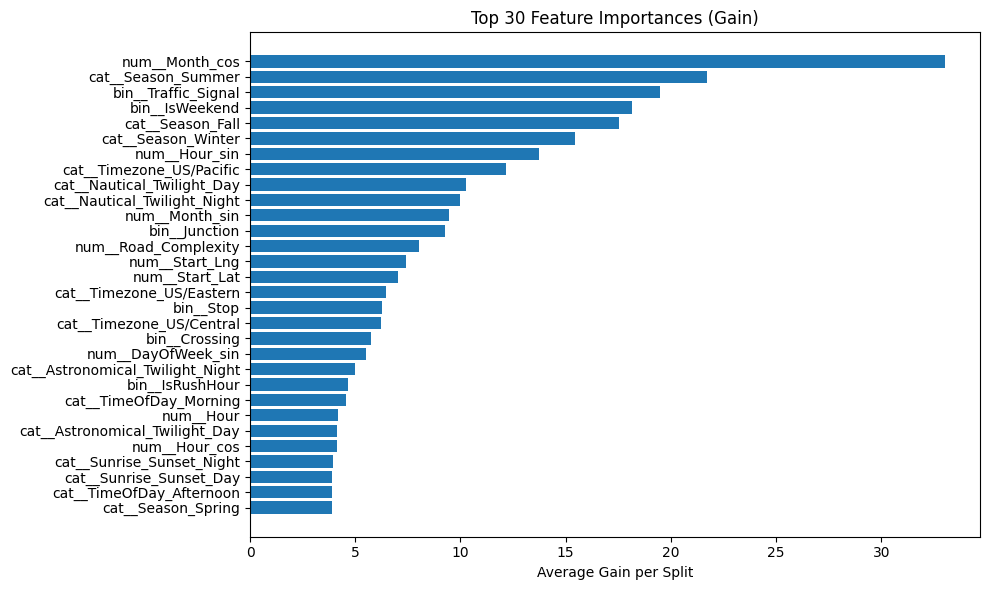

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 如果你剛剛的 pipeline 存在於變數 clf（或在磁碟裡，可用 joblib 載）
# 這段程式碼會自動抓出「真正進模型」的特徵名稱與 gain 重要度，畫出長條圖。

# 1. 自動尋找 feature-selection 步驟名稱（可能叫 select / fs / selectfrommodel …）
selector_name = next(
    (name for name, step in clf.steps if hasattr(step, 'get_support')),
    None
)

if selector_name is None:
    raise RuntimeError("Pipeline 裡找不到 feature-selection 步驟。")

selector = clf.named_steps[selector_name]
mask = selector.get_support()                           # True / False array
feat_all = clf.named_steps['prep'].get_feature_names_out()
feat_used = feat_all[mask]                              # 真正進模型的特徵

# 2. 從 XGBoost booster 取 gain 重要度（dict: {'f0':val0, 'f1':val1, ...}）
booster = clf.named_steps['model'].get_booster()
imp_gain_dict = booster.get_score(importance_type='gain')

# 3. 轉成 numpy array，跟特徵索引對應
imp_gain = np.zeros(len(feat_used))
for k, v in imp_gain_dict.items():
    idx = int(k[1:])        # 'f27' ➜ 27
    if idx < len(imp_gain): # 保險檢查
        imp_gain[idx] = v

# 4. DataFrame 排序，方便觀看 & 做圖
imp_df = (pd.DataFrame({'Feature': feat_used, 'Gain': imp_gain})
            .sort_values('Gain', ascending=False)
            .reset_index(drop=True))

# 5. 顯示一下維度資訊
print(f"原始特徵維度：{len(feat_all)}")
print(f"篩選後維度：{len(feat_used)}")

# 6. 畫 Top-20 bar chart
topk = 30
plt.figure(figsize=(10, 6))
plt.barh(imp_df['Feature'][:topk][::-1], imp_df['Gain'][:topk][::-1])
plt.xlabel("Average Gain per Split")
plt.title(f"Top {topk} Feature Importances (Gain)")
plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------------------------------------
# 0. 前置：取模型、特徵名稱、測試資料
# ---------------------------------------------------------
import shap, numpy as np

# (1) 取得已訓練好的 XGBoost 分類器
xgb_model = clf.named_steps['model']              # XGBClassifier

# (2) 取真正進模型的特徵名稱 feat_used
selector_name = next((n for n,s in clf.steps if hasattr(s,'get_support')), None)
feat_used = clf.named_steps['prep'].get_feature_names_out()[clf.named_steps[selector_name].get_support()]

# (3) 將 X_test 經過「前處理 + 特徵選擇」得到模型實際輸入
X_test_prep = clf.named_steps['prep'].transform(X_test)
X_test_sel  = clf.named_steps[selector_name].transform(X_test_prep)   # 仍可能是 CSR

# ---------------------------------------------------------
# 1. 建立 SHAP Explainer（取 100 筆背景樣本即可加速）
# ---------------------------------------------------------
explainer = shap.TreeExplainer(xgb_model)
background = shap.sample(X_test_sel, 100, random_state=42)   # 不影響結果，只是提速
shap_values = explainer.shap_values(X_test_sel, check_additivity=False)

# ---------------------------------------------------------
# 3. Summary bar：純影響度（|SHAP| 平均）
# ---------------------------------------------------------
shap.summary_plot(
    shap_values, X_test_sel,
    feature_names=feat_used,
    plot_type='bar',
    max_display=20
)


c:\Users\Tim Chen\OneDrive\桌面\台大\大三下\製造數據科學\Final Project\MDS-Final-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


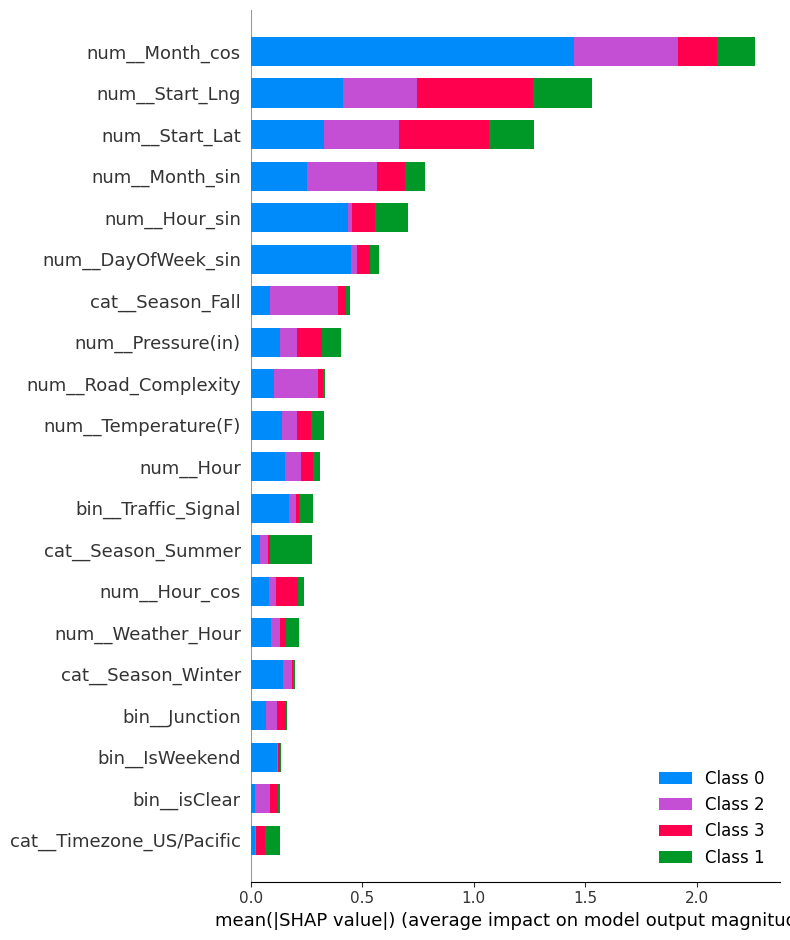

In [ ]:
# ---------------------------------------------------------
# 0. 前置：取模型、特徵名稱、測試資料
# ---------------------------------------------------------
import shap, numpy as np

xgb_model = clf.named_steps['model']                       # 1) classifier
selector_name = next((n for n, s in clf.steps if hasattr(s, 'get_support')), None)
feat_used = clf.named_steps['prep'].get_feature_names_out()[clf.named_steps[selector_name].get_support()]

X_test_prep = clf.named_steps['prep'].transform(X_test)
X_test_sel  = clf.named_steps[selector_name].transform(X_test_prep)   # 可能是 CSR

# ---------------------------------------------------------
# 1. 建立 SHAP explainer（用 100 筆背景樣本加速）
# ---------------------------------------------------------
explainer = shap.TreeExplainer(
    xgb_model,
    data=shap.sample(X_test_sel, 100, random_state=42),     # background
    feature_perturbation="tree_path_dependent"
)

shap_values = explainer.shap_values(X_test_sel, check_additivity=False)  # list of 4 arrays

# ---------------------------------------------------------
# 2. Beeswarm summary（點雲／小提琴）
# ---------------------------------------------------------
import matplotlib.pyplot as plt
shap.initjs()                              # 互動版本（Notebook/Lab 有效）

# 可選：隨機抽樣 2000 筆避免點太多
idx = np.random.RandomState(0).choice(X_test_sel.shape[0], 2000, replace=False)
shap.summary_plot(
    shap_values,                 # list OK（多類別自動堆疊顏色）
    X_test_sel[idx],
    feature_names=feat_used,
    max_display=20,              # 排名前 20
    show=True                    # Jupyter 內直接顯示
)
plt.tight_layout()

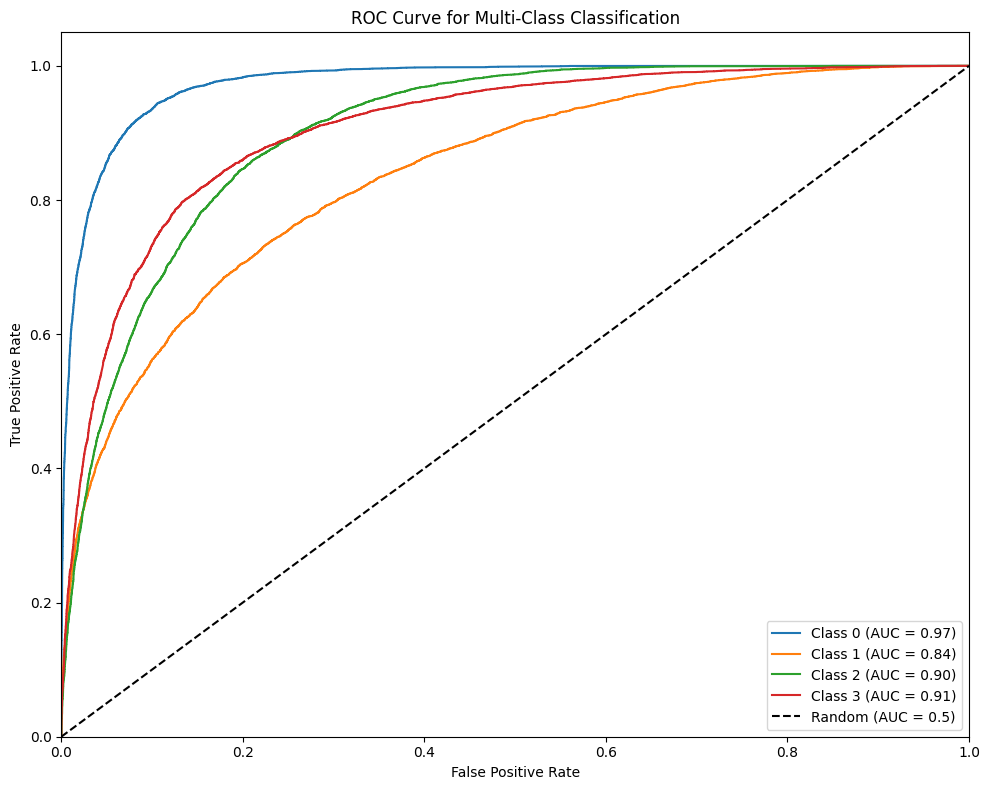

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 將 y_test 和 y_score 改成二進制格式（One-vs-Rest）
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # 根據你的類別數目調整
n_classes = y_test_bin.shape[1]

# 計算 ROC 曲線數據
fpr = {}
tpr = {}
roc_auc = {}

# 用每個類別計算 ROC 曲線
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 畫圖
plt.figure(figsize=(10, 8))

# 畫每個類別的 ROC 曲線
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# 畫對角線（隨機猜測線）
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

# 設定圖表
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
